In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 

test = pd.read_csv('C:/Users/patno_000/OneDrive/Documents/Kaggle/bike_rentals/test.csv')
train = pd.read_csv('C:/Users/patno_000/OneDrive/Documents/Kaggle/bike_rentals/train.csv')

In [56]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')
test['datetime'] = pd.to_datetime(test['datetime'], format='%Y-%m-%d %H:%M:%S')

train['dayofweek'] = train['datetime'].dt.dayofweek
test['dayofweek'] = test['datetime'].dt.dayofweek

train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

print(train.describe())
#print(test.describe(include='all'))

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

[Text(0.5, 0, 'season'),
 Text(1.5, 0, 'holiday'),
 Text(2.5, 0, 'workingday'),
 Text(3.5, 0, 'weather'),
 Text(4.5, 0, 'temp'),
 Text(5.5, 0, 'atemp'),
 Text(6.5, 0, 'humidity'),
 Text(7.5, 0, 'windspeed'),
 Text(8.5, 0, 'casual'),
 Text(9.5, 0, 'registered'),
 Text(10.5, 0, 'count'),
 Text(11.5, 0, 'dayofweek'),
 Text(12.5, 0, 'hour')]

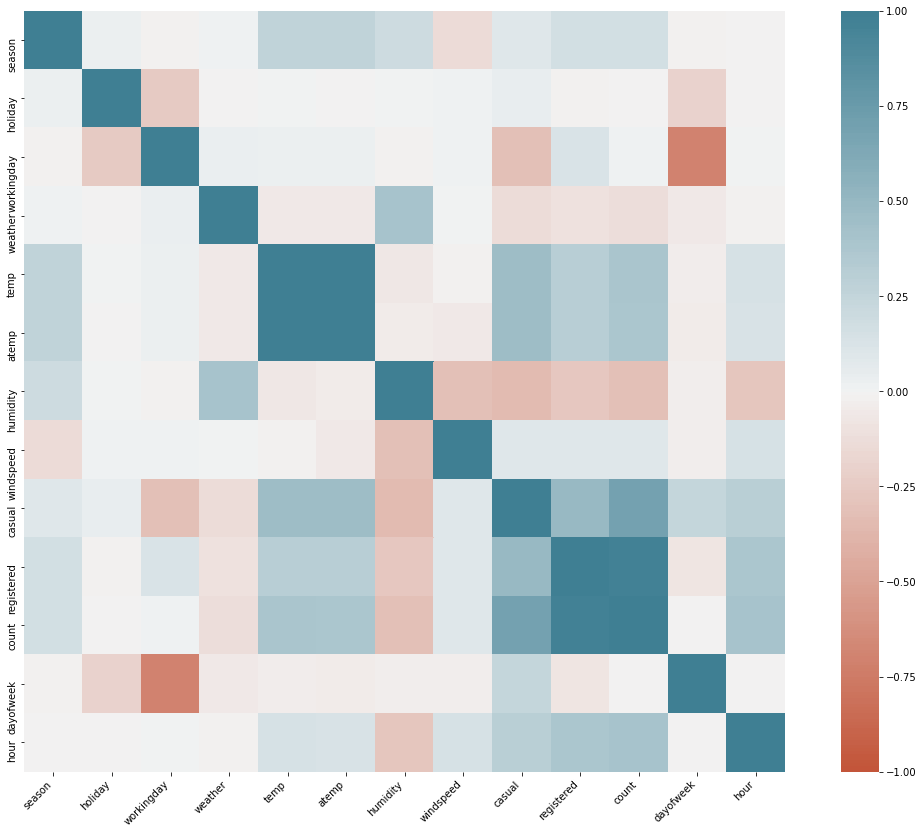

In [57]:
corr = train.loc[:,~train.columns.isin(['datetime'])].corr()
f, ax = plt.subplots(figsize=(20,14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [58]:
small_df = train[['hour', 'dayofweek', 'count']]
small_df.head()

,hour,dayofweek,count
0,0,5,16
1,1,5,40
2,2,5,32
3,3,5,13
4,4,5,1


In [59]:
from sklearn.model_selection import train_test_split
train_small, test_small, train_y, test_y = train_test_split(small_df[['hour', 'dayofweek']], small_df[['count']], test_size=0.3)

In [60]:
mn = small_df[['hour','count']].groupby(['hour']).mean()
small_df1 = small_df.copy()
small_df1.merge(mn, on='hour').head()

,hour,dayofweek,count_x,count_y
0,0,5,16,55.138462
1,0,6,17,55.138462
2,0,0,5,55.138462
3,0,1,5,55.138462
4,0,2,6,55.138462


<AxesSubplot:xlabel='dayofweek', ylabel='count'>

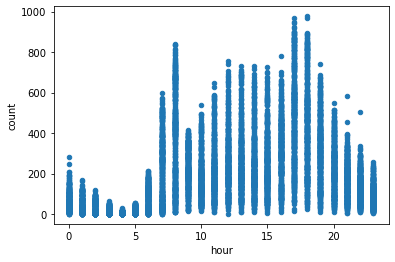

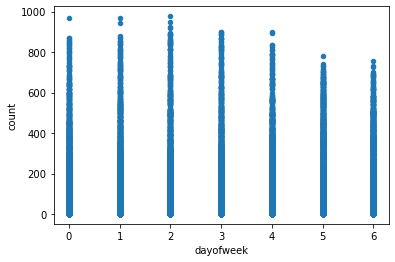

In [61]:
small_df.plot(x='hour',y='count',kind='scatter')
small_df.plot(x='dayofweek',y='count',kind='scatter')

In [62]:
def target_encoder(df, cols: list, target: str):
    """
    encode high cardinality categorical variable by mean of target without noise
    takes pandas data frame, list of cols (as strings), and target name (as string)
    returns data fame with same structure but categorical columns encoded with mean of target for each category
    """
    
    temp = df.copy()
    for col in cols:
        #find mean for all values of categorical variable
        temp_col = df[[col,target]].groupby(col).mean()
        #merge value back to df
        temp1 = temp.merge(temp_col, on=col)

        temp[col] = temp1[target + '_y']
    return temp
small_df_enc1 = target_encoder(small_df, ['hour', 'dayofweek'], 'count') 

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

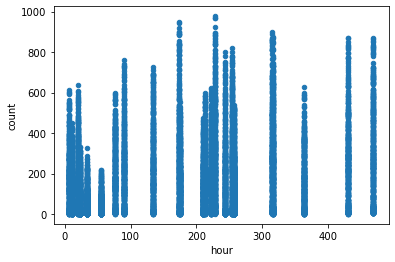

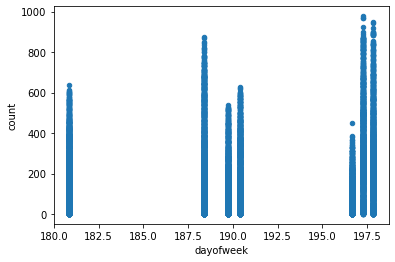

In [63]:
small_df_enc1.plot(x='hour',y='count',kind='scatter')
small_df_enc1.plot(x='dayofweek',y='count',kind='scatter')

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

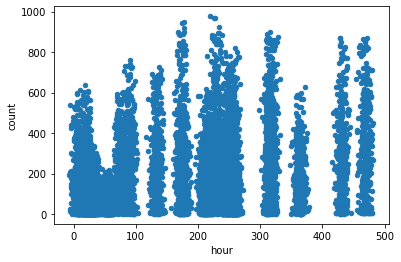

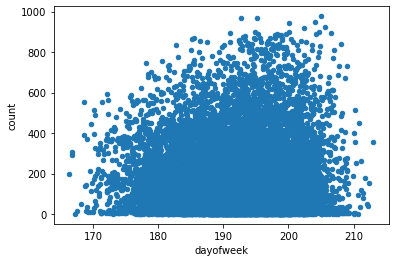

In [64]:
import numpy as np
def target_encoder_noise(df, cols: list, target: str):
    """
    encode high cardinality categorical variable by mean of target without noise to prevent overfitting
    uses fixed noise for now
    takes pandas data frame, list of cols (as strings), and target name (as string)
    returns data fame with same structure but categorical columns encoded with mean of target for each category
    """
    
    temp = df.copy()
    for col in cols:
        temp_col = df[[col,target]].groupby(col).mean()
        temp1 = temp.merge(temp_col, on=col)
        temp[col] = temp1[target + '_y'] + np.random.normal(loc=0, scale=5, size=len(temp1[target + '_y']))
    return temp
small_df_enc2 = target_encoder_noise(small_df, ['hour', 'dayofweek'], 'count')

small_df_enc2.plot(x='hour',y='count',kind='scatter')
small_df_enc2.plot(x='dayofweek',y='count',kind='scatter')